In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Models
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

import os

folder_path = input("Enter your trainset path:")
for dirname, _, filenames in os.walk(folder_path):
    print(dirname)

In [ ]:
print('Total adidas images:', len(os.listdir(folder_path + 'adidas')))
print('Total converse images:', len(os.listdir(folder_path + 'converse')))
print('Total nike images:', len(os.listdir(folder_path + 'nike')))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/train/adidas'

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Text(0.5, 1.0, 'Fourth')

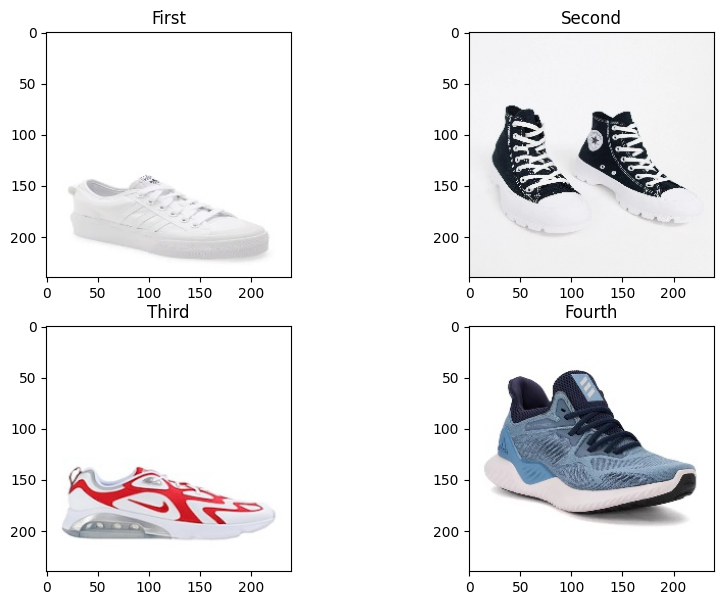

In [ ]:
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

# reading images
Image1 = image.load_img(folder_path + 'adidas/100.jpg')
Image2 = image.load_img(folder_path + 'converse/100.jpg')
Image3 = image.load_img(folder_path + 'nike/100.jpg')
Image4 = image.load_img(folder_path + 'adidas/155.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")

In [ ]:
train_datagen = ImageDataGenerator(
                fill_mode = 'nearest',
                validation_split=0.2
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='training',
)
validation_generator=train_datagen.flow_from_directory(
    folder_path,
    target_size=(108,108),
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
)

Found 570 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:
from keras.applications import ResNet50
model = tf.keras.models.Sequential([
    ResNet50(input_shape=(108,108,3), include_top=False),
])
for layer in model.layers:
  layer.trainable = False

model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 2, 2, 100)         1843300   
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 100)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0 

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,
                    verbose=1,
                    )

Epoch 1/10
18/18 [==============================] - 217s 12s/step - loss: 3.9991 - accuracy: 0.4035 - val_loss: 1.8465 - val_accuracy: 0.5248
Epoch 2/10
18/18 [==============================] - 41s 2s/step - loss: 1.8319 - accuracy: 0.5018 - val_loss: 1.0638 - val_accuracy: 0.5035
Epoch 3/10
18/18 [==============================] - 35s 2s/step - loss: 1.1542 - accuracy: 0.6018 - val_loss: 1.1571 - val_accuracy: 0.5461
Epoch 4/10
18/18 [==============================] - 37s 2s/step - loss: 0.7163 - accuracy: 0.7281 - val_loss: 1.0062 - val_accuracy: 0.6099
Epoch 5/10
18/18 [==============================] - 37s 2s/step - loss: 0.5484 - accuracy: 0.7649 - val_loss: 0.8740 - val_accuracy: 0.6667
Epoch 6/10
18/18 [==============================] - 33s 2s/step - loss: 0.4595 - accuracy: 0.8123 - val_loss: 0.9159 - val_accuracy: 0.6596
Epoch 7/10
18/18 [==============================] - 37s 2s/step - loss: 0.3130 - accuracy: 0.8772 - val_loss: 0.9442 - val_accuracy: 0.6383
Epoch 8/10
18/18 [

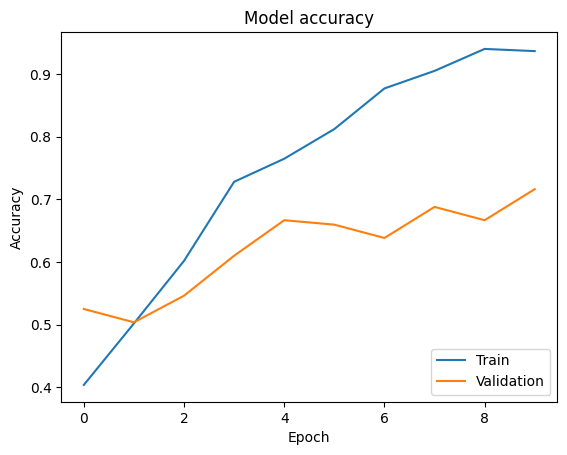

In [ ]:
##什么是history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/COMPS492F_Project-Material/model.h5')
model.save('/content/drive/MyDrive/COMPS492F_Project-Material/model.keras')

After the above steps, I finished the building and training of the model. Now I will try to test the model by dataes in the test_set. I will randomly select four graphs from the test set, and validate if the model is accurate enough.

In [ ]:
path="/content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/test/"
fig=plt.figure(figsize=(10,7))
##fig2只显示一张图
rows=2
columns=2

img1=image.load_img(path+"adidas/0.jpg")
img2=image.load_img(path+"nike/1.jpg")
img3=image.load_img(path+"converse/2.jpg")
img4=image.load_img(path+"nike/3.jpg")

fig.add_subplot(rows, columns, 1)
plt.imshow(img1)
plt.title("first")

fig.add_subplot(rows, columns, 2)
plt.imshow(img2)
plt.title("second")

fig.add_subplot(rows, columns, 3)
plt.imshow(img3)
plt.title("third")

fig.add_subplot(rows, columns, 4)
plt.imshow(img4)
plt.title("four")


In [ ]:
'''
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

folder_path="/content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/test/"
# reading images
Image1 = image.load_img(folder_path + 'adidas/0.jpg')
Image2 = image.load_img(folder_path + 'converse/1.jpg')
Image3 = image.load_img(folder_path + 'nike/2.jpg')
Image4 = image.load_img(folder_path + 'adidas/3.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.title("First")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.title("Second")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.title("Third")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.title("Fourth")
'''

In [ ]:
##Here I will load the model

model_for_test=tf.keras.models.load_model("/content/drive/MyDrive/COMPS492F_Project-Material/model.h5")

This cell is use the lecture-provided test script, it is temporarily useless.

In [ ]:
##Now is test part
import tensorflow as tf
import numpy as np
import os
import argparse
from PIL import Image

parser = argparse.ArgumentParser()
parser.add_argument('/content/drive/MyDrive/COMPS492F_Project-Material/model.h5', type=str, help='Path to the trained model.')
parser.add_argument('/content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/test/nike/3.jpg', type=str, help='Path to the test data.')
parser.add_argument('/content/drive/MyDrive/COMPS492F_Project-Material', type=str, help='Path to save the results.')
args = parser.parse_args()

# Load model
model = tf.keras.models.load_model(args.model_path)

# Load images
images = []
for filename in os.listdir(args.test_data_path):
    img = tf.io.read_file(os.path.join(args.test_data_path, filename))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [108, 108])
    img = img / 255.0  # normalize to [0,1] range
    images.append(img)
images = np.array(images)

# Classify images
predictions = model.predict(images)
results = np.argmax(predictions, axis=1)

# Save results to txt
np.savetxt(args.result_path, results, fmt='%d')

In [ ]:
%tb

Here I try to input path by hand, because this is a prototype of test script, in the next cell, I will try to use the for loop to check the four pictures.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# 设置图片的路径和模型的路径
image_path = '/content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/test/adidas/0.jpg'  # 替换为您的测试图片路径
model_path = '/content/drive/MyDrive/COMPS492F_Project-Material/model.h5'  # 替换为您保存的模型文件路径

# 加载模型
model = tf.keras.models.load_model(model_path)

# 加载并预处理图片
img = image.load_img(image_path, target_size=(108,108))  # 假设您的模型输入大小是224x224
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # 归一化到[0,1]区间

# 使用模型进行预测
predictions = model.predict(img_tensor)

# 输出预测结果
print('Predicted:', np.argmax(predictions[0]))  # 输出预测类别的索引

# 如果您有标签映射（例如类别名称），您还可以输出具体的类别名称
labels = ['adidas', 'converse','nike']  # 替换为您的标签列表
print('Predicted class:', labels[np.argmax(predictions[0])])

这里是测试输入超参数的版本
Enter the training_set_path/content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/test
Enter the model_path/content/drive/MyDrive/COMPS492F_Project-Material/model.h5

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from pathlib import Path

# 设置训练集图片所在的文件夹路径和模型的路径
test_images_dir = input("Enter the test_set_path")  # 替换为训练集图片所在的文件夹路径
model_path = input("Enter the model_path") # 替换为您保存的模型文件路径

# 加载模型
model = tf.keras.models.load_model(model_path)

# 获取训练集图片的所有子文件夹路径（即类别）
class_dirs = [d for d in Path(test_images_dir).iterdir() if d.is_dir()]

# 遍历每个类别
for class_dir in class_dirs:
    class_name = class_dir.name  # 获取类别名称
    class_images = list(class_dir.glob('*.jpg'))  # 假设图片是.jpg格式，您可以根据需要修改

    # 遍历该类别的所有图片
    for image_path in class_images:
        # 加载并预处理图片
        img = image.load_img(str(image_path), target_size=(108, 108))  # 调整图片大小
        img_tensor = image.img_to_array(img)
        img_tensor = np.expand_dims(img_tensor, axis=0)
        img_tensor /= 255.  # 归一化到[0,1]区间

        # 使用模型进行预测
        predictions = model.predict(img_tensor)
        print(predictions)

        # 输出预测结果
        predicted_class = np.argmax(predictions[0])
        ##print(f'Predicted class for {image_path} is: {predicted_class}')

        # 如果您有标签映射，可以输出具体的类别名称
        image_parts = Path(image_path).parts[-2:]
        category_from_path = image_parts[-2]
        image_name_from_path = image_parts[-1]

        # 输出预测结果和路径的最后两层
        print(f'Predicted class for {image_name_from_path} in {category_from_path} is: {predicted_class}')


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from pathlib import Path

# 设置测试集图片所在的文件夹路径和模型的路径
test_images_dir = input("Enter the test_set_path: ")  # 替换为测试集图片所在的文件夹路径
model_path = input("Enter the model_path: ")  # 替换为您保存的模型文件路径
output_file_path = input("Enter the path to save predictions, you need to firstly create txt file and input its' path : ")  # 用户手动设置存储路径

# 加载模型
model = tf.keras.models.load_model(model_path)

class_name=['adidas','converse','nike']

# 获取测试集图片的所有子文件夹路径（即类别）
class_dirs = [d for d in Path(test_images_dir).iterdir() if d.is_dir()]

# 确保输出文件路径的目录存在
output_dir = Path(output_file_path).parent
if not output_dir.exists():
    output_dir.mkdir(parents=True, exist_ok=True)

# 打开文件用于写入预测结果
with open(output_file_path, 'w') as f:
    # 遍历每个类别
    for class_dir in class_dirs:
        class_name = class_dir.name  # 获取类别名称
        class_images = list(class_dir.glob('*.jpg'))  # 假设图片是.jpg格式，您可以根据需要修改

        # 遍历该类别的所有图片
        for image_path in class_images:
            # 加载并预处理图片
            img = image.load_img(str(image_path), target_size=(108, 108))  # 调整图片大小
            img_tensor = image.img_to_array(img)
            img_tensor = np.expand_dims(img_tensor, axis=0)
            img_tensor /= 255.  # 归一化到[0,1]区间

            # 使用模型进行预测
            predictions = model.predict(img_tensor)
            predicted_class = np.argmax(predictions[0])

            ##为预测的类名设置标签
            predicted_class_name=class_name[predicted_class]

            # 提取图片路径的最后两层：类别文件夹和图片文件名
            image_parts = Path(image_path).parts[-2:]
            category_from_path = image_parts[-2]
            image_name_from_path = image_parts[-1]

            # 格式化预测结果并写入文件
            classname=['adidas','converse','nike']
            output_line = f'Predicted class for {image_name_from_path} in {category_from_path} is: {predicted_class_name}\n'
            f.write(output_line)

# 文件会在with块结束后自动关闭
print(f"Predictions have been saved to {output_file_path}")

Enter the test_set_path: /content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/test
Enter the model_path: /content/drive/MyDrive/COMPS492F_Project-Material/model.h5
Enter the path to save predictions : /content/drive/MyDrive/COMPS492F_Project-Material/saving-project-result.txt
1/1 [==============================] - 0s 103ms/step
Predictions have been saved to /content/drive/MyDrive/COMPS492F_Project-Material/saving-project-result.txt


/content/drive/MyDrive/COMPS492F_Project-Material/Nike_Adidas_converse_Shoes_image_dataset/Nike_Adidas_converse_Shoes_image_dataset/test


/content/drive/MyDrive/COMPS492F_Project-Material/model.h5


/content/drive/MyDrive/COMPS492F_Project-Material/saving-project-result.txt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
